# Reconhecimento Ótico de Caracteres 

### **IMPORTS**

In [1]:
# Data manipulation
import numpy as np

# Image manipulation
import cv2
import matplotlib.pyplot as plt

# OCR packages
import pytesseract
from paddleocr import PaddleOCR, draw_ocr

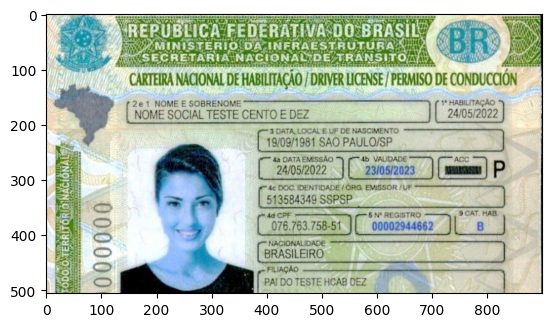

In [2]:
# Imagem original
img = cv2.imread("img_cnh.jpg")
plt.imshow(img)
plt.show()

### **PRÉ-PROCESSAMENTO**

In [3]:
# Pré-Processamento
img_rec = cv2.cvtColor(
    img, 
    cv2.COLOR_BGR2RGB
)

img_rec = cv2.cvtColor(
    img_rec, 
    cv2.COLOR_BGR2GRAY
)



### **DETECÇÃO DE REGIÕES DE INTERESSE**
- Foto
- Nome
- CPF
- Data de Nascimento
- Categoria
- Data de validade

In [5]:
class CNH:
    def __init__(self, nome=None, cpf=None, data_nas=None, categoria=None, validade=None):
        self.nome = nome
        self.cpf = cpf
        self.data_nas = data_nas
        self.categoria = categoria
        self.validade = validade

In [12]:
cnh = CNH()

nome = img[170:200, 140:500]
text_nome = pytesseract.image_to_string(nome)
cnh.nome = text_nome.strip()

cpf = img[370:400, 410:550]
text_cpf = pytesseract.image_to_string(cpf)
cnh.cpf = text_cpf.strip()

data_nas = img[220:250, 360:490]
text_data_nas = pytesseract.image_to_string(data_nas)
cnh.data_nas = text_data_nas.strip()

categoria = img_rec[370:400,760:850]
ocr = PaddleOCR(usa_angle_cls=True, lang= 'en')

result = ocr.ocr(categoria,cv2.COLOR_BGR2RGB)

validade = img[270:300, 570:680]
text_validade = pytesseract.image_to_string(validade)
cnh.validade = text_validade.strip()

[2023/05/15 13:43:28] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/home/brain/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/home/brain/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_score_thresh=0.5, e2e_pgn

In [18]:
cnh = CNH(
    nome=text_nome.strip(), 
    cpf=text_cpf.strip(), 
    data_nas=text_data_nas.strip(), 
    categoria=result[0][0][1][0], 
    validade=text_validade.strip()
)

# Acessar os atributos do objeto CNH
print('Nome:',cnh.nome)
print('CPF:',cnh.cpf)
print('Data de Nascimento:', cnh.data_nas)
print('Categoria da habilitação:', cnh.categoria)
print('Data de Validade:', cnh.validade)

Nome: NOME SOCIAL TESTE CENTO E DEZ
CPF: 076.763.758-54
Data de Nascimento: 19/09/1981
Categoria da habilitação: B
Data de Validade: 23/05/2023


#### **Detecção da foto**

In [ ]:
# Detecção da foto do CNH
cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
face = cascade.detectMultiScale(
		img_rec, 
        scaleFactor=1.1, 
        minNeighbors=3
)

for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Mostrar a imagem com a detecção e após ser tratada 
fig, ax = plt.subplots(
    1, 
    2, 
    figsize=(12, 5)
)

ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(img_rec, cv2.COLOR_BGR2RGB))

plt.tight_layout()

### **RECONHECIMENTO ÓPTICO DE CARACTERES - OCR**

In [ ]:
# OCR packages Paddle
ocr = PaddleOCR()

result = ocr.ocr(img_rec,cv2.COLOR_BGR2RGB)
result